In [13]:
import cdsapi

import xarray as xr
import matplotlib.pyplot as plt

# Cimate Data Store ERA5 Re-analysis

## Requirements
Please download the following packages using your package manager (pip, uv, conda-forge): `cdsapi`, `xarray`, `matplotlib`, `cfgrib`

## API Request

How to use the below API. 
**Note:** This does require you to create a CDS profile. 

1. Get your API  configured fro use in a .cdsapirc file from [https://cds.climate.copernicus.eu/profile](https://cds.climate.copernicus.eu/profile). It should look like this

    ```
    url: https://cds.climate.copernicus.eu/api
    key: 12345:abcdefg-hijklmn
    ```

2. Create the config file locally using `nano ~/.cdsapirc` and save the above text within the file. 
3. Execute the below API request




In [15]:

dataset = "reanalysis-era5-single-levels"
request = {
    "product_type": ["reanalysis"],
    "variable": [
        "10m_u_component_of_wind",
        "10m_v_component_of_wind"
    ],
    "year": ["2026"],
    "month": ["01"],
    "day": ["01"],
    "time": ["00:00"],
    "data_format": "grib",
    "download_format": "unarchived"
}

client = cdsapi.Client()
client.retrieve(dataset, request).download()


2026-01-30 11:38:24,613 INFO [2025-12-11T00:00:00] Please note that a dedicated catalogue entry for this dataset, post-processed and stored in Analysis Ready Cloud Optimized (ARCO) format (Zarr), is available for optimised time-series retrievals (i.e. for retrieving data from selected variables for a single point over an extended period of time in an efficient way). You can discover it [here](https://cds.climate.copernicus.eu/datasets/reanalysis-era5-single-levels-timeseries?tab=overview)
2026-01-30 11:38:24,614 INFO Request ID is 80841727-1051-4884-9c7a-8f617dad87da
2026-01-30 11:38:24,876 INFO status has been updated to accepted
2026-01-30 11:38:39,433 INFO status has been updated to running
2026-01-30 11:38:47,278 INFO status has been updated to successful


'4bad4e322b9c77f1b1748adb36cf7647.grib'

## Simple Visualizations

The following cells will visualize Significant Wave Height (swh) and a component of 10m wind (u or v). 
These are two important variables within wave forecasts, and critically they lie on two different grid resolutions. Respectively $0.5^\circ$ for waves and $0.25^\circ$ for wind

### Significant Wave Height

In [21]:
# Please adjust file name to your downloaded file
file_name = "data/69c55e7977e7a5cfc68d215b34233752.grib"

In [22]:
# Open the grib2 file using xarray
ds = xr.open_dataset(
    file_name,
    engine="cfgrib"
)

ds

<xarray.Dataset> Size: 2MB
Dimensions:     (latitude: 361, longitude: 720)
Coordinates:
  * latitude    (latitude) float64 3kB 90.0 89.5 89.0 88.5 ... -89.0 -89.5 -90.0
  * longitude   (longitude) float64 6kB 0.0 0.5 1.0 1.5 ... 358.5 359.0 359.5
    number      int64 8B ...
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    meanSea     float64 8B ...
    valid_time  datetime64[ns] 8B ...
Data variables:
    mwp         (latitude, longitude) float32 1MB ...
    swh         (latitude, longitude) float32 1MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-30T11:45 GRIB to CDM+CF via cfgrib-0.9.1...

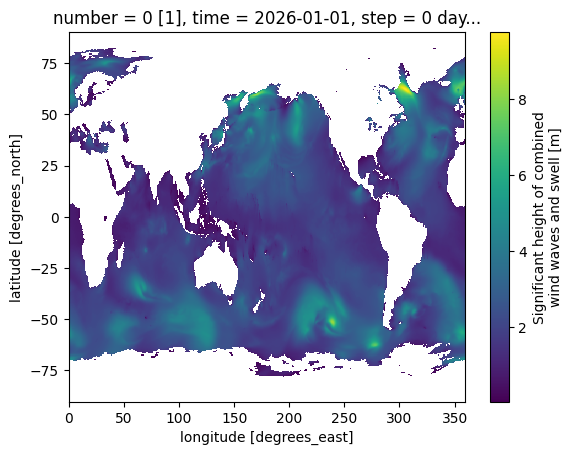

In [ ]:
# Plot significant wave height
ds["swh"].plot()
plt.show()

### u-component of 10m WInd

In [23]:
filename_wind = "data/4bad4e322b9c77f1b1748adb36cf7647.grib"

In [24]:
# Open the grib2 file using xarray
ds_wind = xr.open_dataset(
    filename_wind,
    engine="cfgrib"
)

ds_wind

<xarray.Dataset> Size: 8MB
Dimensions:     (latitude: 721, longitude: 1440)
Coordinates:
  * latitude    (latitude) float64 6kB 90.0 89.75 89.5 ... -89.5 -89.75 -90.0
  * longitude   (longitude) float64 12kB 0.0 0.25 0.5 0.75 ... 359.2 359.5 359.8
    number      int64 8B ...
    time        datetime64[ns] 8B ...
    step        timedelta64[ns] 8B ...
    surface     float64 8B ...
    valid_time  datetime64[ns] 8B ...
Data variables:
    u10         (latitude, longitude) float32 4MB ...
    v10         (latitude, longitude) float32 4MB ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2026-01-30T11:45 GRIB to CDM+CF via cfgrib-0.9.1...

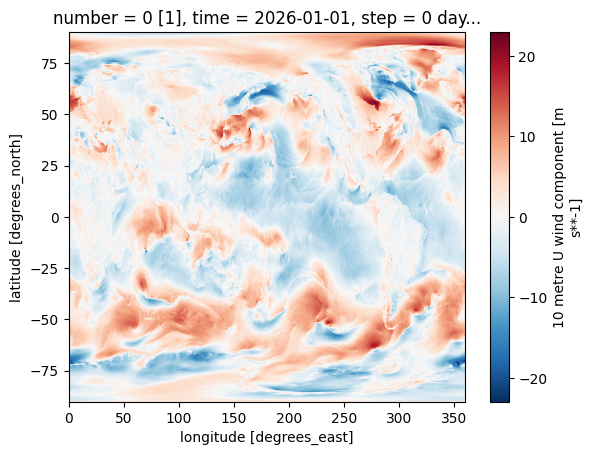

In [20]:
# Plot significant wave height
ds_wind["u10"].plot()
plt.show()